In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
#carregar arquivos csv 
navios_sines_imos = pd.read_csv('dataset_navios_with_imos.csv')
imos_navios_caracteristicas = pd.read_csv('df_imos_caracteristicas.csv')
porto_sines_caracteristicas = pd.read_csv('porto_caracteristicas_terminais.csv', encoding='latin1')

In [49]:
#merge dos dataframes navios_sines_imos e imos_navios_caracteristicas com base na coluna Imo e IMO number
navios_sines_imos = pd.merge(navios_sines_imos, imos_navios_caracteristicas, left_on='Imo', right_on='IMO number')

In [50]:
navios_sines_imos.head(10)

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Imo,Voyage Origin Port,...,Engine type,Year of build,Builder,Classification society,Home port,Owner,Manager,Description,Engine model,Engine power
0,Container,Container Terminal XXI,14.5,15.0,Container Ship,CONTAINER SHIPS,1208.0,15.9,9279977,ANTWERP,...,NaN,2004,HYUNDAI SAMHO HEAVY INDUSTRIES CO. LTD. - MOKP...,GERMANISCHER LLOYD,Panama,NaN,NaN,MSC POH LIN is a Container ship built in 2004 ...,NaN,NaN
1,7,Oil and Products Terminal,18.9,19.2,LPG Tanker,LPG CARRIERS,27.0,4.8,9261578,LISBOA,...,Schottel,2004,"CANTIERE NAVALE DE POLI - VENEZIA, ITALY",NaN,NaN,"LUMASHIP - NAPOLI, ITALY","LUMASHIP - NAPOLI, ITALY",MADDY is a LPG carrier built in 2004 by CANTIE...,STP 550,2100 KW
2,6,Oil and Products Terminal,17.5,41.2,Oil Products Tanker,WET BULK,4.0,5.2,9428671,SINES,...,Daihatsu,2007,"SOPO SHIPYARD - ZHENJIANG, CHINA",BUREAU VERITAS,SANTA CRUZ DE TENERIFE,"NAVIERA MURUETA - BILBAO, SPAIN","NAVIERA MURUETA - BILBAO, SPAIN",BAHIA TRES is a Oil tanker built in 2007 by SO...,6DS-32,3500 KW
3,Container,Container Terminal XXI,22.1,22.2,Container Ship,CONTAINER SHIPS,281.0,14.9,9289099,ALGECIRAS,...,MAN-B&W,2005,"HANJIN HEAVY INDUSTRIES CO. LTD. - BUSAN, SOUT...",GERMANISCHER LLOYD,HAMBURG,"OFFEN REEDEREI - HAMBURG, GERMANY","OFFEN REEDEREI - HAMBURG, GERMANY",MSC BEIJING is a Container ship built in 2005 ...,12RTA-96C,61800 KW
4,3,Oil and Products Terminal,0.3,16.9,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.2,9319179,SINES ANCH,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
5,3,Oil and Products Terminal,33.0,33.4,Oil/Chemical Tanker,WET BULK,1387.0,6.7,9373230,LEIXOES,...,B&W,2007,"SOLI SHIPYARD - ISTANBUL, TURKEY",REGISTRO ITALIANO NAVALE,PALERMO,"ELBANA DI NAVIGAZIONE - PIOMBINO, ITALY","ELBANA DI NAVIGAZIONE - PIOMBINO, ITALY",AETHALIA is a Chemical/Oil tanker built in 200...,8s35mc,5920 KW
6,3,Oil and Products Terminal,0.4,25.1,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.3,9319179,SINES,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
7,Container,Container Terminal XXI,16.8,17.2,Container Ship,CONTAINER SHIPS,1314.0,16.7,9403396,GIOIA TAURO,...,MAN-B&W,2009,"HANJIN SUBIC SHIPYARD - OLONGAPO, PHILIPPINES",GERMANISCHER LLOYD,MONROVIA,"NSC HOLDING - HAMBURG, GERMANY","NSC HOLDING - HAMBURG, GERMANY",MSC CANCUN is a Container ship built in 2009 b...,8K90MC-C,36560 KW
8,Sines LNG,REN Atlantico Terminal LNG,1.4,25.1,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.3,9319179,SINES,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
9,Container,Container Terminal XXI,15.7,16.0,Container Ship,CONTAINER SHIPS,1908.0,14.5,9279965,NEMRUT,...,NaN,2004,HYUNDAI SAMHO HEAVY INDUSTRIES CO. LTD. - MOKP...,GERMANISCHER LLOYD,Panama,NaN,NaN,MSC FABIENNE is a Container ship built in 2004...,NaN,NaN


In [51]:
#contar nulls no dataframe em cada coluna
navios_sines_imos.isnull().sum()

Berth Name                      0
Terminal Name                   0
Time At Berth                   0
Time At Port                    0
Vessel Type - Generic           0
Commercial Market               0
Voyage Distance Travelled       0
Voyage Speed Average            0
Imo                             0
Voyage Origin Port              0
IMO number                      0
MMSI                            1
Name of the ship                0
Former names                  556
Vessel type                     0
Operating status                1
Flag                            0
Gross tonnage                   0
Deadweight                      1
Length                          1
Breadth                         1
Engine type                  1222
Year of build                   0
Builder                        20
Classification society        380
Home port                     358
Owner                         273
Manager                       273
Description                     0
Engine model  

In [52]:
#Selecionar colunas para o modelo
df_modelagem = navios_sines_imos[['Berth Name', 'Terminal Name', 'Time At Berth', 'Time At Port' , 'Vessel Type - Generic', 'Commercial Market','Voyage Distance Travelled', 'Voyage Speed Average', 'Year of build', 'Voyage Origin Port', 'Flag', 'Gross tonnage', 'Deadweight', 'Length', 'Breadth' ]]

In [53]:
#remover linhas  com valores nulos
df_modelagem = df_modelagem.dropna()

In [54]:
df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1770 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   object 
 1   Terminal Name              1770 non-null   object 
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   object 
 5   Commercial Market          1770 non-null   object 
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   object 
 10  Flag                       1770 non-null   object 
 11  Gross tonnage              1770 non-null   object 
 12  Deadweight                 1770 non-null   object 
 13  Length                     1770 non-null   object 
 1

In [55]:
#transformar colunas object em numericas

from sklearn.preprocessing import LabelEncoder

df_modelagem = df_modelagem.copy()

# Encode all columns object type
for column in df_modelagem.columns:
    if df_modelagem[column].dtype == type(object):
        le = LabelEncoder()
        df_modelagem[column] = le.fit_transform(df_modelagem[column])

df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1770 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   int32  
 1   Terminal Name              1770 non-null   int32  
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   int32  
 5   Commercial Market          1770 non-null   int32  
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   int32  
 10  Flag                       1770 non-null   int32  
 11  Gross tonnage              1770 non-null   int32  
 12  Deadweight                 1770 non-null   int32  
 13  Length                     1770 non-null   int32  
 1

In [56]:
#aplicando a transformação logarítmica

df_modelagem[['Time At Berth', 'Time At Port']] = np.log(df_modelagem[['Time At Berth', 'Time At Port']])

c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [57]:
df_modelagem

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Year of build,Voyage Origin Port,Flag,Gross tonnage,Deadweight,Length,Breadth
0,11,0,2.674149,2.708050,3,0,1208.0,15.9,2004,6,26,178,260,81,21
1,9,2,2.939162,2.954910,11,4,27.0,4.8,2004,64,27,81,149,106,3
2,8,2,2.862201,3.718438,14,7,4.0,5.2,2007,105,32,156,274,116,7
3,11,0,3.095578,3.100092,3,0,281.0,14.9,2005,2,10,231,9,93,25
4,5,2,-1.203973,2.827314,5,6,2.0,5.2,2005,106,27,130,112,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,5,1,2.459589,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1767,5,1,2.442347,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1768,5,1,2.468100,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1769,5,1,-2.302585,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36


In [58]:
# Remover linhas com valores infinitos na coluna 'Time At Berth'
df_modelagem = df_modelagem[np.isfinite(df_modelagem['Time At Berth'])]

In [59]:
df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1769 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1769 non-null   int32  
 1   Terminal Name              1769 non-null   int32  
 2   Time At Berth              1769 non-null   float64
 3   Time At Port               1769 non-null   float64
 4   Vessel Type - Generic      1769 non-null   int32  
 5   Commercial Market          1769 non-null   int32  
 6   Voyage Distance Travelled  1769 non-null   float64
 7   Voyage Speed Average       1769 non-null   float64
 8   Year of build              1769 non-null   int64  
 9   Voyage Origin Port         1769 non-null   int32  
 10  Flag                       1769 non-null   int32  
 11  Gross tonnage              1769 non-null   int32  
 12  Deadweight                 1769 non-null   int32  
 13  Length                     1769 non-null   int32  
 1

In [60]:
from sklearn.model_selection import train_test_split

X = df_modelagem.drop('Time At Berth', axis=1)
y = df_modelagem['Time At Berth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


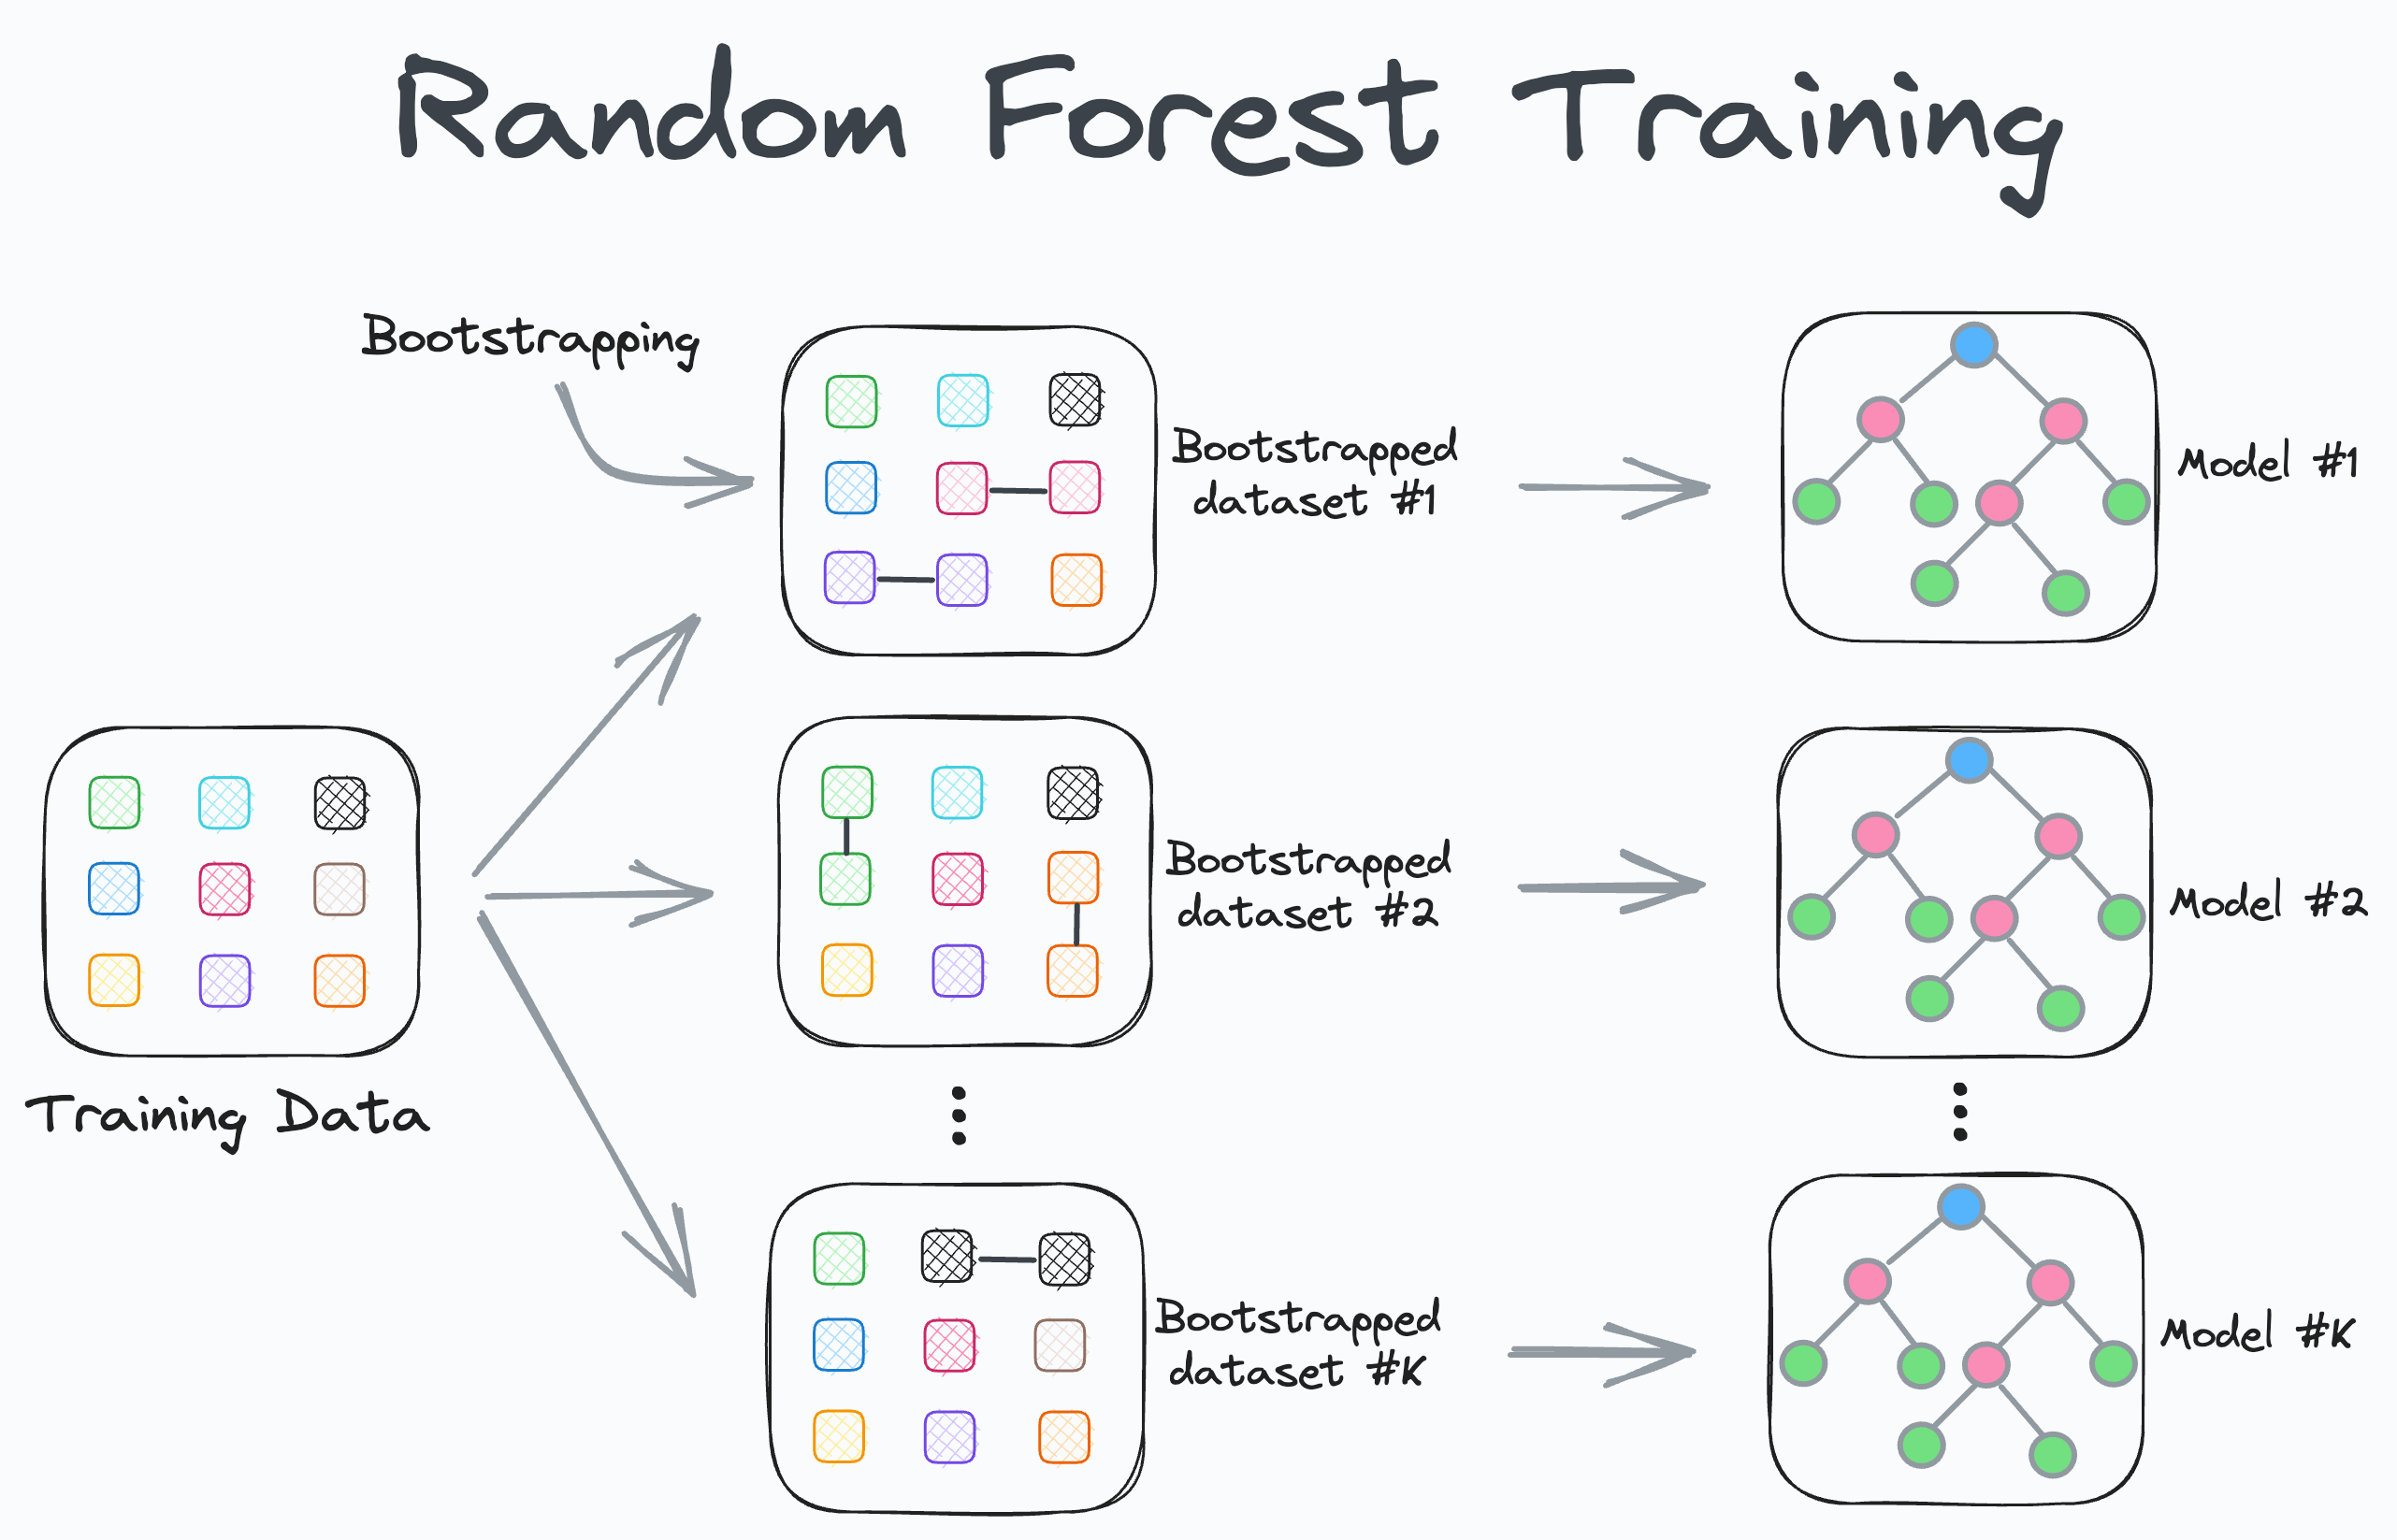 <style>img { max-width: 500px; }</style>

In [61]:
#modelo de reandom forest refressor para prever o tempo de atracação
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_rf = RandomForestRegressor(n_estimators=50, random_state=13, oob_score=True, bootstrap=True)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


In [62]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

#R quadrado
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_rf)
print(f'R^2: {r2}')

Mean Squared Error: 0.38903413877229576
R^2: 0.880689318792742


In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
print(f"R² (Linear Regression): {r2_lr}")

Mean Squared Error: 1.0837461544057343
R² (Linear Regression): 0.6676320172159081


C:\Users\klysm\AppData\Local\Temp\ipykernel_22104\3392918068.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


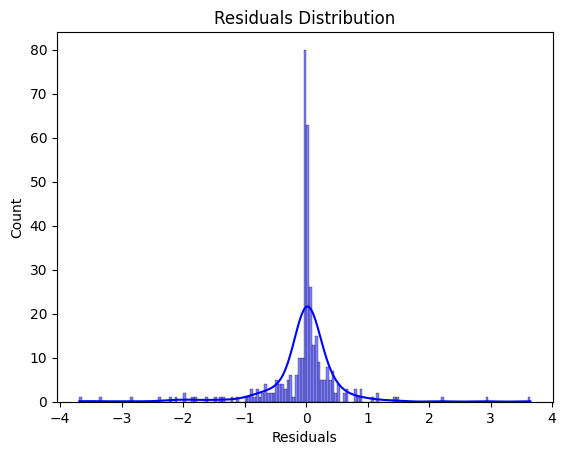

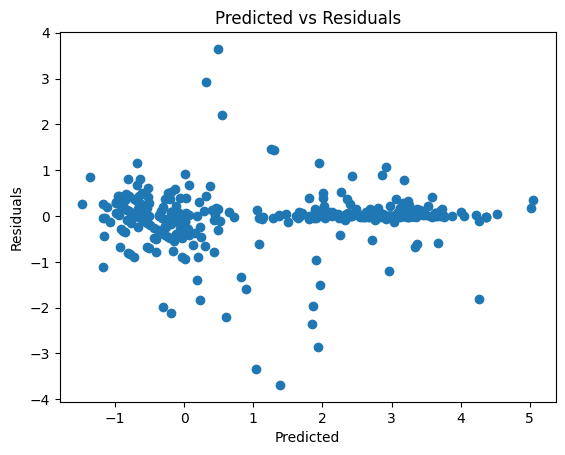

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

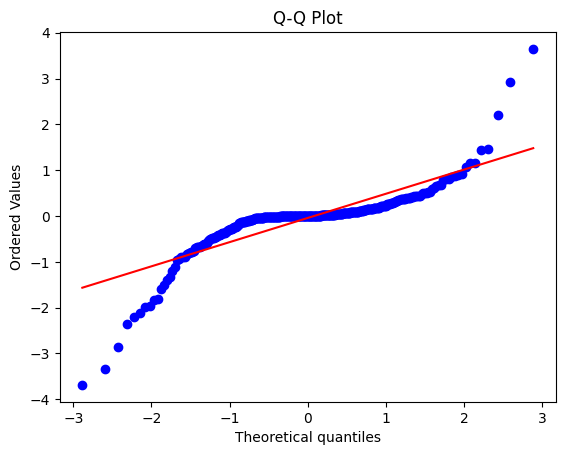

In [65]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

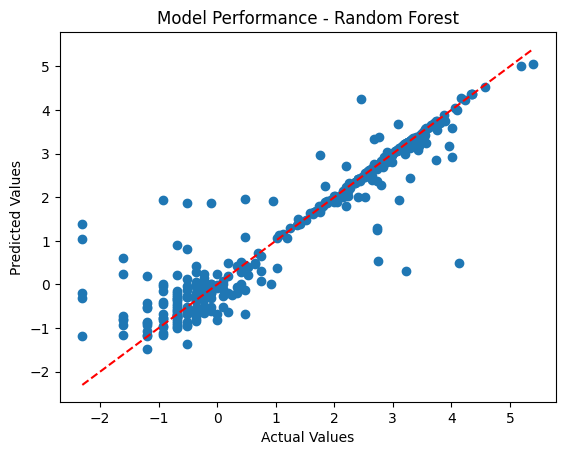

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred_rf)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance - Random Forest')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Show the plot
plt.show()

### out-of-bag

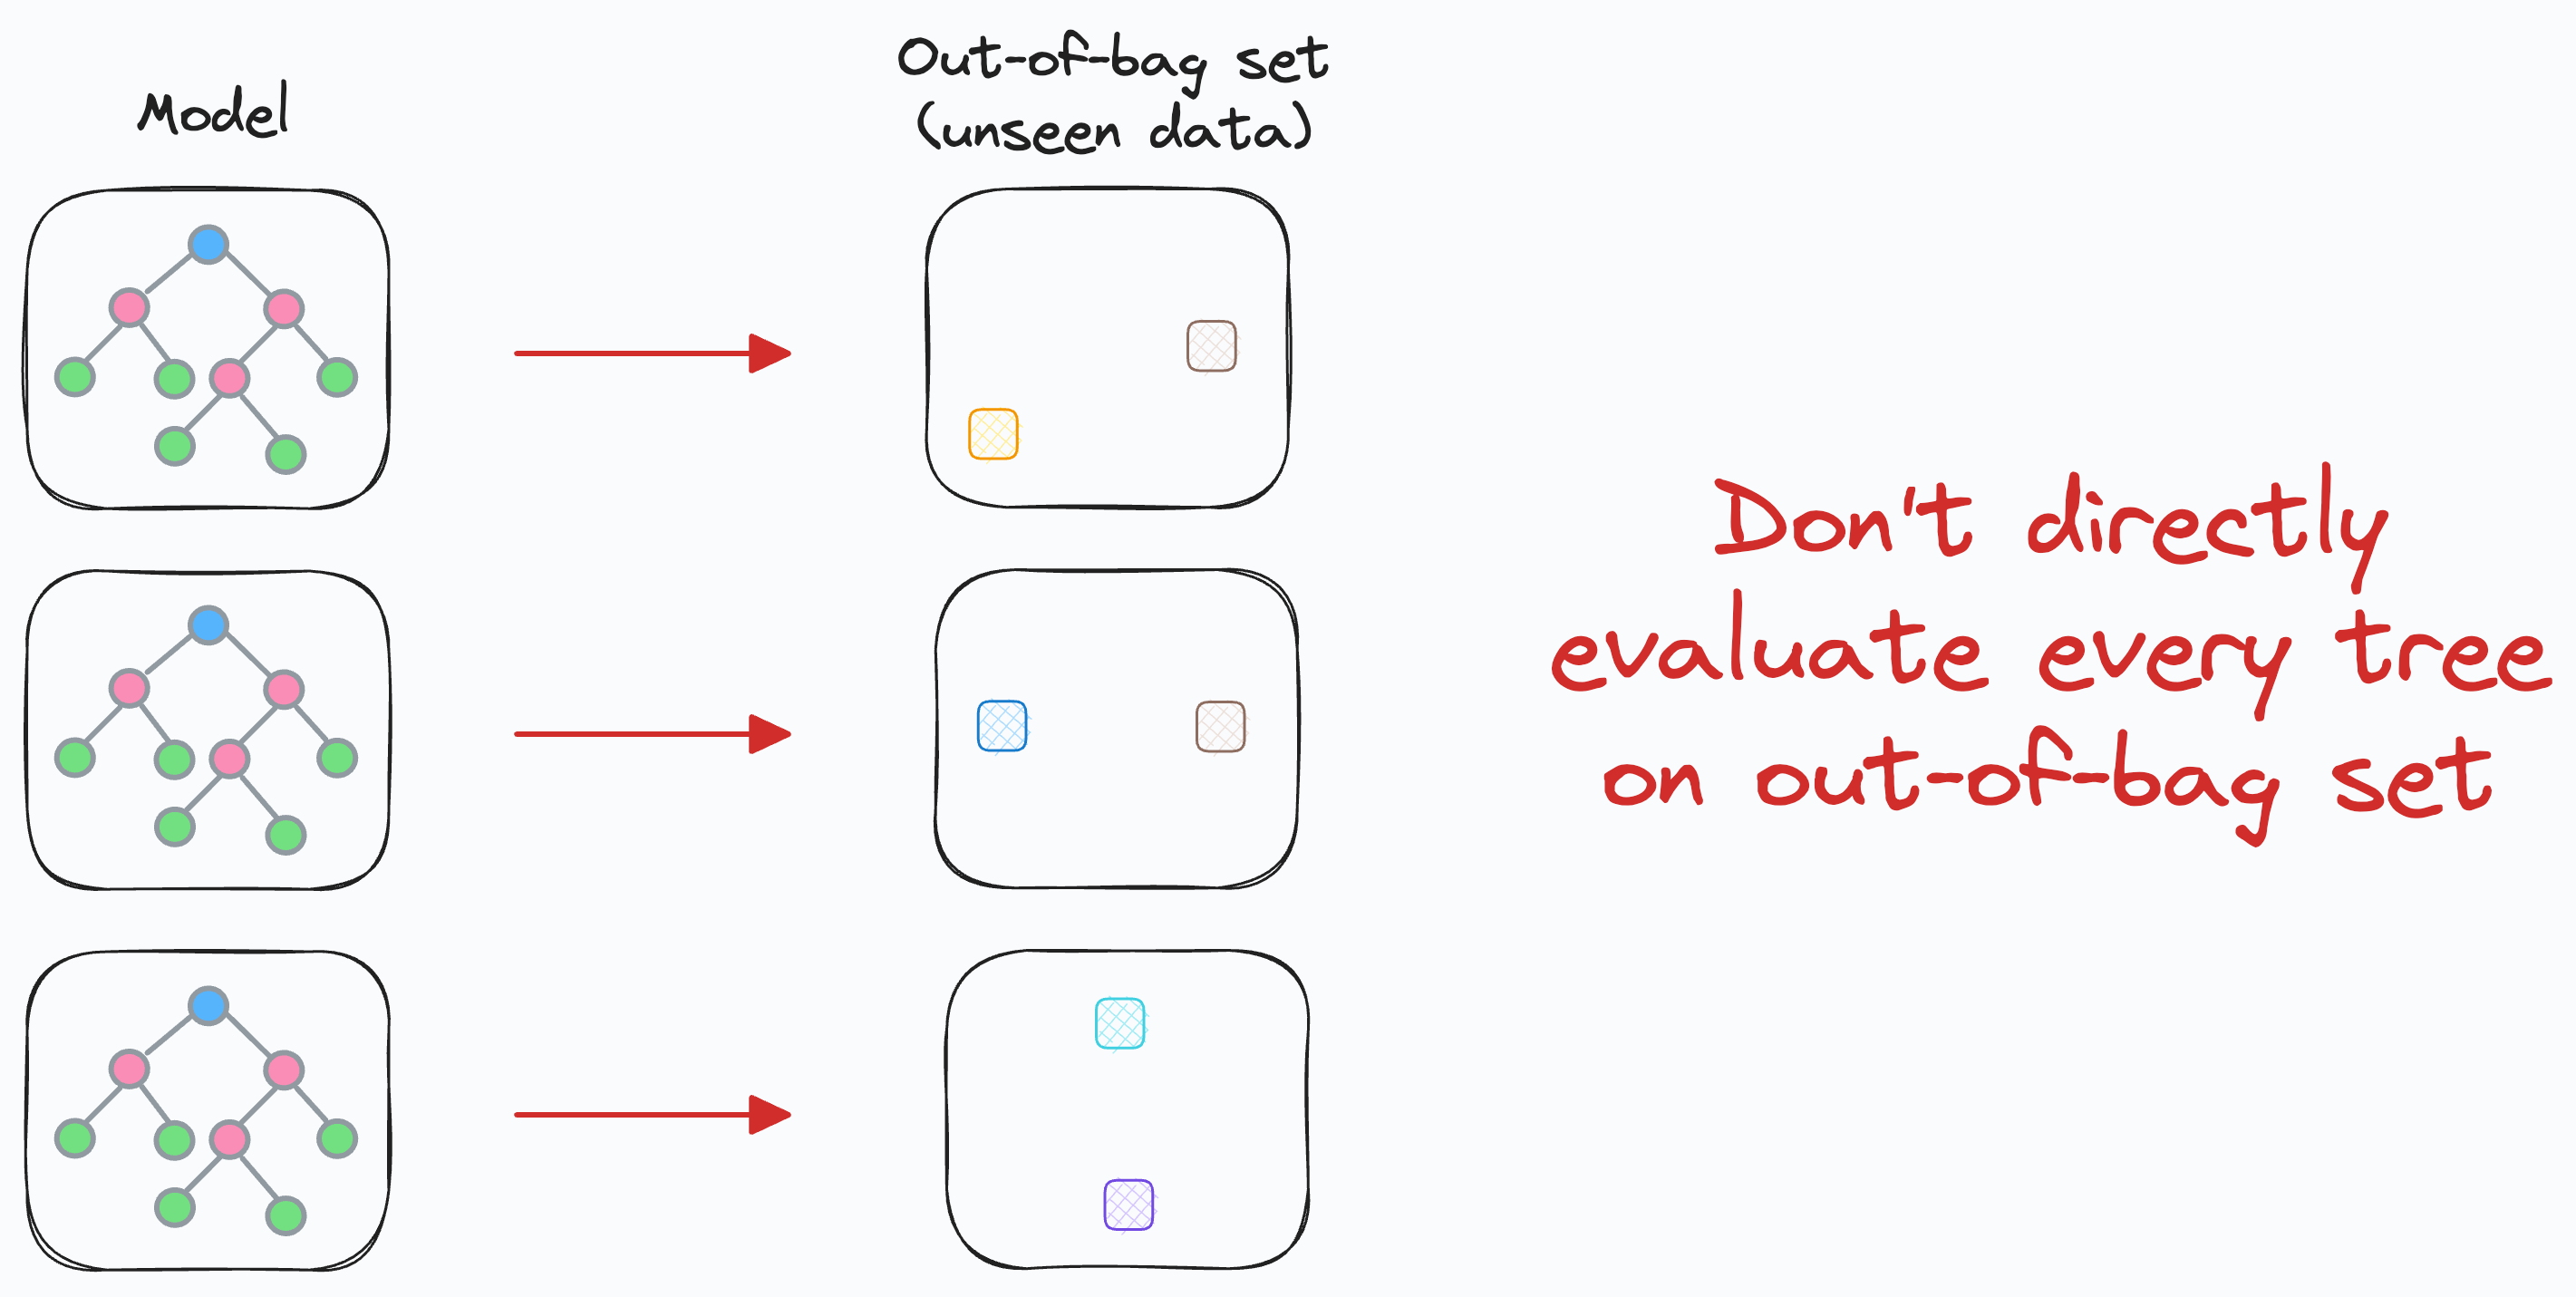 <style>img { max-width: 500px; }</style>

O out-of-bag score é uma métrica que mede a acurácia do modelo de Random Forest usando as amostras que não foram usadas para treinamento. Essas amostras são chamadas de out-of-bag samples e são usadas para avaliar o modelo sem a necessidade de um conjunto de validação separado. O out-of-bag score é uma estimativa da acurácia do modelo na população e é uma métrica útil para avaliar a capacidade de generalização do modelo. Quanto maior o out-of-bag score, melhor é a capacidade de generalização do modelo.

Em situações de poucos dados, a validação out-of-bag evita a divisão de dados enquanto obtém um bom proxy para validação do modelo.

In [67]:
oob_score = model_rf.oob_score_
print(f"Out-of-Bag Score: {oob_score}")

Out-of-Bag Score: 0.8704422099406749


In [68]:
importance = model_rf.feature_importances_
feature_names = X_train.columns

# Criar um dataframe com as features e suas importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar as features pela importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir as features mais importantes
print(feature_importance_df)

                      Feature  Importance
5   Voyage Distance Travelled    0.569859
2                Time At Port    0.188561
4           Commercial Market    0.102130
0                  Berth Name    0.031366
12                     Length    0.025659
6        Voyage Speed Average    0.025365
10              Gross tonnage    0.021390
1               Terminal Name    0.017257
7               Year of build    0.005860
13                    Breadth    0.003222
9                        Flag    0.002888
11                 Deadweight    0.002317
8          Voyage Origin Port    0.002159
3       Vessel Type - Generic    0.001966


In [69]:
def verificar_valores_reais(y_test, y_pred_rf):    
    comparison_df = pd.DataFrame({
        'True Value': y_test,
        'Predicted Value': y_pred_rf,

    })

    # Display the first few rows of the DataFrame
    print(comparison_df.tail(15))

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def model_performance(y_true, y_pred_rf):
    mse = mean_squared_error(y_true, y_pred_rf)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred_rf)
    
    print("Mean Squared Error (MSE): ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("R-squared (R2 Score): ", r2)

In [71]:
verificar_valores_reais(y_test, y_pred_rf)
print("\n")
model_performance(y_test, y_pred_rf)

      True Value  Predicted Value
832     2.734368         2.702978
548    -0.693147        -0.495640
175     3.532226         3.370574
620    -0.356675        -0.619483
530     3.135494         3.129355
1088    3.456317         3.172723
999    -0.916291        -0.947720
834     0.182322         0.190131
1144    2.459589         4.261667
906    -1.203973        -1.473935
1263    2.727853         2.637219
198     3.529297         3.448449
15     -0.510826        -0.952010
265    -0.693147        -0.203647
538    -0.510826        -0.855779


Mean Squared Error (MSE):  0.38903413877229576
Root Mean Squared Error (RMSE):  0.623726012582685
R-squared (R2 Score):  0.880689318792742


In [72]:
#https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will

import statsmodels.formula.api as smf
statsmodels = smf.ols('y ~ X', data=df_modelagem)
statsmodels = statsmodels.fit()
print(statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     274.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:32   Log-Likelihood:                -2552.4
No. Observations:                1769   AIC:                             5135.
Df Residuals:                    1754   BIC:                             5217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.5655      8.152    -21.292      0.0